## Amazon Coding Challenge
## Tianheng Zhou 2022/06/21

In [1]:
import matplotlib.pyplot as plt
from matplotlib import colors
import itertools
import numpy as np
np.random.seed(42)

In [2]:
class Node():
    """A node class for A* Pathfinding"""

    def __init__(self, parent=None, position=None):
        self.parent = parent
        self.position = position

        self.g = 0
        self.h = 0
        self.f = 0

    def __eq__(self, other):
        return self.position == other.position

## A* Algorithm

In [3]:
def astar(maze, start, end):
    """Returns a list of tuples as a path from the given start to the given end in the given maze"""

    # Create start and end node
    start_node = Node(None, start)
    start_node.g = start_node.h = start_node.f = 0
    end_node = Node(None, end)
    end_node.g = end_node.h = end_node.f = 0

    # Initialize both open and closed list
    open_list = []
    closed_list = []

    # Add the start node
    open_list.append(start_node)

    # Loop until you find the end
    while len(open_list) > 0:

        # Get the current node
        current_node = open_list[0]
        current_index = 0
        for index, item in enumerate(open_list):
            if item.f < current_node.f:
                current_node = item
                current_index = index

        # Pop current off open list, add to closed list
        open_list.pop(current_index)
        closed_list.append(current_node)

        # Found the goal
        if current_node == end_node:
            path = []
            current = current_node
            while current is not None:
                path.append(current.position)
                current = current.parent
            return path[::-1] # Return reversed path

        # Generate children
        children = []
        for new_position in [(0, -1), (0, 1), (-1, 0), (1, 0), (-1, -1), (-1, 1), (1, -1), (1, 1)]: # Adjacent squares

            # Get node position
            node_position = (current_node.position[0] + new_position[0], current_node.position[1] + new_position[1])

            # Make sure within range
            if node_position[0] > (len(maze) - 1) or node_position[0] < 0 or node_position[1] > (len(maze[len(maze)-1]) -1) or node_position[1] < 0:
                continue

            # Make sure walkable terrain
            if maze[node_position[0]][node_position[1]] != 0:
                continue

            # Create new node
            new_node = Node(current_node, node_position)

            # Append
            children.append(new_node)

        # Loop through children
        for child in children:

            # Child is on the closed list
            for closed_child in closed_list:
                if child == closed_child:
                    continue

            # Create the f, g, and h values
            child.g = current_node.g + 1
            child.h = ((child.position[0] - end_node.position[0]) ** 2) + ((child.position[1] - end_node.position[1]) ** 2)
            child.f = child.g + child.h

            # Child is already in the open list
            for open_node in open_list:
                if child == open_node and child.g > open_node.g:
                    continue

            # Add the child to the open list
            open_list.append(child)

# Phase 1

In [4]:
maze =     [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
            [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]]

start = (0, 0)
end = (9, 9)

path = astar(maze, start, end)
print(path)

[(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9)]


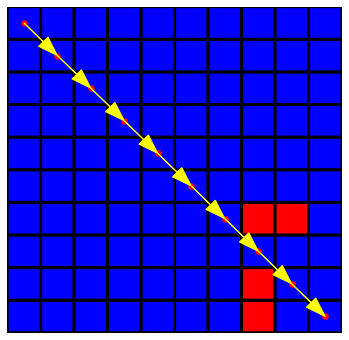

In [5]:
%matplotlib inline
cmap = colors.ListedColormap(['Blue','red'])
plt.figure(figsize=(6,6))
plt.pcolor(maze[::-1],cmap=cmap,edgecolors='k', linewidths=3)
plt.axis("off")
last_x = 0
last_y = 0

for k,x in enumerate(path):
    plt.scatter(x[1]+0.5,10-(x[0]+0.5), marker='o', s=30, color='red')
    
    if k >=1:
        plt.arrow(last_x, last_y, x[1]+0.5 - last_x, 10-(x[0]+0.5) - last_y,
              head_width=0.4, length_includes_head=True, color = "yellow")
        
    last_x = x[1]+0.5
    last_y = 10-(x[0]+0.5)
    
plt.show()

# Phase 2

In [6]:
maze =     [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
            [0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
            [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
            [0, 0, 0, 1, 0, 0, 1, 0, 0, 1],
            [0, 0, 0, 0, 1, 0, 1, 0, 1, 0],
            [0, 0, 0, 0, 1, 0, 1, 0, 1, 0],
            [0, 0, 0, 0, 1, 0, 1, 1, 1, 0],
            [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
            [0, 0, 0, 0, 1, 1, 1, 1 ,0, 1],
            [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]]

start = (0, 0)
end = (9, 9)

path = astar(maze, start, end)
print(path)


[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (1, 9), (2, 9), (3, 8), (4, 9), (5, 9), (6, 9), (7, 9), (8, 8), (9, 9)]


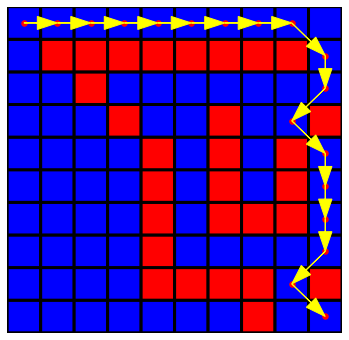

In [7]:
%matplotlib inline
cmap = colors.ListedColormap(['Blue','red'])
plt.figure(figsize=(6,6))
plt.pcolor(maze[::-1],cmap=cmap,edgecolors='k', linewidths=3)
plt.axis("off")
last_x = 0
last_y = 0

for k,x in enumerate(path):
    plt.scatter(x[1]+0.5,10-(x[0]+0.5), marker='o', s=30, color='red')
    
    if k >=1:
        plt.arrow(last_x, last_y, x[1]+0.5 - last_x, 10-(x[0]+0.5) - last_y,
              head_width=0.4, length_includes_head=True, color = "yellow")
        
    last_x = x[1]+0.5
    last_y = 10-(x[0]+0.5)
    
plt.show()


In [8]:
maze2 =  np.random.choice([0, 1], size=(10,10), p=[.8, .2])
maze2[0,0] = 0
maze2[8,7] = maze2[9,7] = maze2[6,7] = maze2[6,8] = 1 
maze2[9,9] = 0

In [9]:
maze2

array([[0, 1, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 1, 1, 1],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]])

In [10]:
path2 = astar(maze2, start, end)
print(path2)

[(0, 0), (1, 0), (2, 1), (3, 2), (4, 2), (5, 1), (6, 1), (7, 2), (8, 3), (9, 4), (9, 5), (8, 6), (7, 7), (7, 8), (8, 9), (9, 9)]


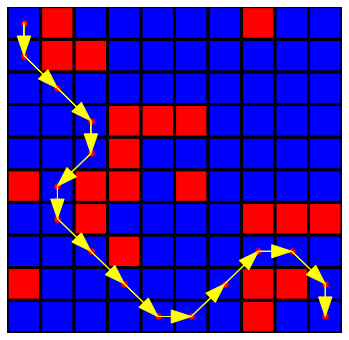

In [11]:
%matplotlib inline
cmap = colors.ListedColormap(['Blue','red'])
plt.figure(figsize=(6,6))
plt.pcolor(maze2[::-1],cmap=cmap,edgecolors='k', linewidths=3)
plt.axis("off")
last_x = 0
last_y = 0

for k,x in enumerate(path2):
    plt.scatter(x[1]+0.5,10-(x[0]+0.5), marker='o', s=30, color='red')
    
    if k >=1:
        plt.arrow(last_x, last_y, x[1]+0.5 - last_x, 10-(x[0]+0.5) - last_y,
              head_width=0.4, length_includes_head=True, color = "yellow")
        
    last_x = x[1]+0.5
    last_y = 10-(x[0]+0.5)
    
plt.show()